<h1> Stage:1 </h1>
#### Objective:  
<li>Calculate % growth of funding between year 2008 & 2009.</li>
<li>If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable</li>



## Dataset Summary
<p>This data set provides information for STEM education (pre-kindergarten through graduate) investments funded by Federal agencies at the level of $300,000 or above.</p>


In [2]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from datetime import datetime
from sklearn.feature_selection import RFE


In [8]:
df = pd.read_excel(r'C:\Users\hp\Downloads\redcarpet.xls')
print(df.shape)
df.head(2)

(254, 255)


,PROGRAM,Unnamed: 1,Unnamed: 2,Unnamed: 3,FUNDING,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,NaN,NaN,Y3) Process or Implementation Evaluation Type,NaN,NaN,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN


In [9]:
df= df.reset_index(drop=True)
final_df= df.rename(columns=df.iloc[0])
df_work = final_df.reindex(final_df.index.drop(0))
final = df_work.loc[:, df_work.isnull().mean() <= .35] # Dropping the Column having more than 35 % null value
final.replace(np.nan, 0, inplace=True) #Replacing nan value with zero
print(final.shape)
final.head(2)

(253, 19)


,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,nan,nan,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,L) Minority Serving Institutions,Q) Legislation Required to Shift Focus?,U) Measured Outputs,nan
1,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,Institutional Capacity: Support advancement an...,Engagement in authentic STEM experience (inclu...,Training or professional development,0,No,No,No,Don't know,0,0
2,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.00,14.00,14.0,General STEM,"Engagement: Increase learners’ engagement, int...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,Yes,No,No,Don't know,0,0


In [10]:
final.rename(columns={'C1) Funding FY2008': 'fund_2008', 'C2) Funding FY2009': 'fund_2009','C3) Funding FY2010':'fund_2010'}, inplace=True)

## Observation:
<li> After Dropping the column having more than 35 % null value,The dataset reduce drastically from 255 feature to 19 feature</li>
<li> All the nan value is replace with zero</li>

#### Calculate Percentage Growth in Between 2008 && 2009

<p>Percent Increse/Decrease = ((New_Amount - Original_Amount)/Original_Amount)*100 if it comes positive means increment else decrement</p>

In [11]:
amount_2008 = list(final['fund_2008'])
amount_2009 = list(final['fund_2009'])
percent_growth = []

target = []
for i in range(0, len(amount_2008)):

    if amount_2008[i] == 0:
        percent_growth.append(amount_2009[i]*100)
        target.append(0)
        continue
        

    growth = (amount_2009[i] - amount_2008[i]) / amount_2008[i]
    percent_growth.append(growth * 100)
    if growth > 0:
        target.append(1)
    else:
        target.append(0)

print(percent_growth)

[37.21374045801527, 0.0, 0.0, 157.98687089715534, 68.09815950920249, 0.0, 1.8181818181818195, 69.16267444282443, 20.429277331686208, 7.765567765567768, -13.142857142857142, -8.055009823182715, 0.7578701904391771, 9.603004291845489, 994.9999999999999, -7.540394973070017, 30.87071240105542, 79.6323375809484, 60.315940641455235, 108.9009990917348, -1.3229308005427427, 5.676855895196502, 55.719557195571944, 38.48920863309351, 16.810344827586214, 9.229219143576822, 2.256361017762854, 1.9705197827773406, 85.18518518518518, 45.843828715365234, 99.13043478260867, 8.391167192429021, 4.609374999999999, 4.673839946200406, 5.016061279960468, 16.020236087689717, 9.536082474226799, 108.08950086058522, 273.90700902151275, -10.256410256410255, 0.0, 0.0, 0.0, 12.068965517241383, -5.140845070422532, -1.9499999999999962, -1.5210608424337029, -12.89111389236546, 0.0, 158.87035276840163, 52.742616033755276, -23.63273453093812, 99.304, -3.558208053184248, 27.17770034843206, 35.5, 0.0, 151.09170305676852, 13

In [12]:
final['Percent_Growth']=percent_growth

final['Target']=target
final.head(2)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,fund_2008,fund_2009,fund_2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,...,nan,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,L) Minority Serving Institutions,Q) Legislation Required to Shift Focus?,U) Measured Outputs,nan,Percent_Growth,Target
1,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,Institutional Capacity: Support advancement an...,...,Training or professional development,0,No,No,No,Don't know,0,0,37.21374,1
2,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.00,14.00,14.0,General STEM,"Engagement: Increase learners’ engagement, int...",...,Training or professional development,Pre-K-20 learners,Yes,No,No,Don't know,0,0,0.00000,0


In [13]:
df2 = final.loc[:, final.columns.notnull()]
print(df2.shape)
df2.head(3)


(253, 18)


,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,fund_2008,fund_2009,fund_2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,L) Minority Serving Institutions,Q) Legislation Required to Shift Focus?,U) Measured Outputs,Percent_Growth,Target
1,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.70,General STEM,Institutional Capacity: Support advancement an...,0,No,No,No,Don't know,0,37.21374,1
2,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.00,14.00,14.00,General STEM,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,Yes,No,No,Don't know,0,0.00000,0
3,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.00,5.00,4.37,General STEM,Institutional Capacity: Support advancement an...,0,No,No,No,Don't know,0,0.00000,0


## Conclusion:
<li> The column having Name as nan has been dropped because it doesnt make any sense</li>
<li> Target Column is added accoring to perecentage growth in funding,if funding increses it become 1 else 0</li>

<h1> Stage 2 </h1>

## Objective:
<li>Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook</li>
<li>Calculate mutual_info_score of target variable created in stage 1 && ALL non funding variables</li>

#### Univariate Analysis


In [15]:
df2.rename(columns={'B) Year Established': 'Year', 'D) Mission-specific or General STEM?': 'Misson_Stem','I1) STEM Learners Targeted? Specify.':'Learner','U) Measured Outputs':'Output'}, inplace=True)

In [16]:
df2.columns

Index(['Investment Name', 'Agency', 'Subagency', 'A) Brief Description',
       'Year', 'fund_2008', 'fund_2009', 'fund_2010', 'Misson_Stem',
       'F1) Primary Investment Objective', 'Learner',
       'J) Focus on Underrepresented Groups in STEM',
       'K) Eligibility Restrictions', 'L) Minority Serving Institutions',
       'Q) Legislation Required to Shift Focus?', 'Output', 'Percent_Growth',
       'Target'],
      dtype='object')

In [19]:
for c in df2.columns:
    print("---- %s ---", c)
    print (df2[c].value_counts())

---- %s --- Investment Name
Global Learning and Observations to Benefit the Environment (GLOBE)                                                        2
Climate Change Education (CCE)                                                                                             1
AESP - Aerospace Education Services Project                                                                                1
Global Change Education Program                                                                                            1
Garrett A. Morgan Technology and Transportation Education Program                                                          1
LTP - Learning Technologies Project                                                                                        1
University NanoSatellite Program                                                                                           1
Ernest F. Hollings Undergraduate Scholarship Program                                             

#### For Non Funding Feature We will select those feature having less no. of  counts of unique values. So that we can get some good interpetation in univariate analysis

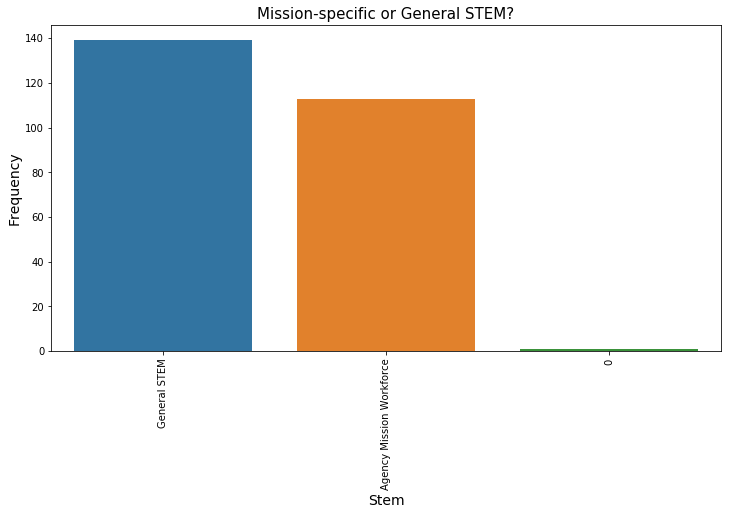

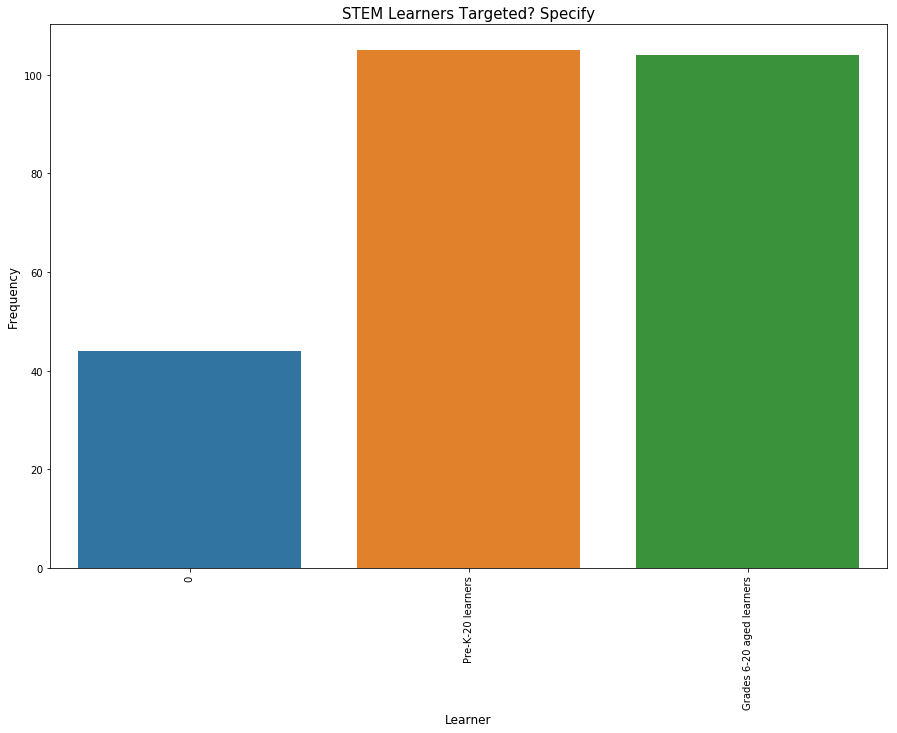

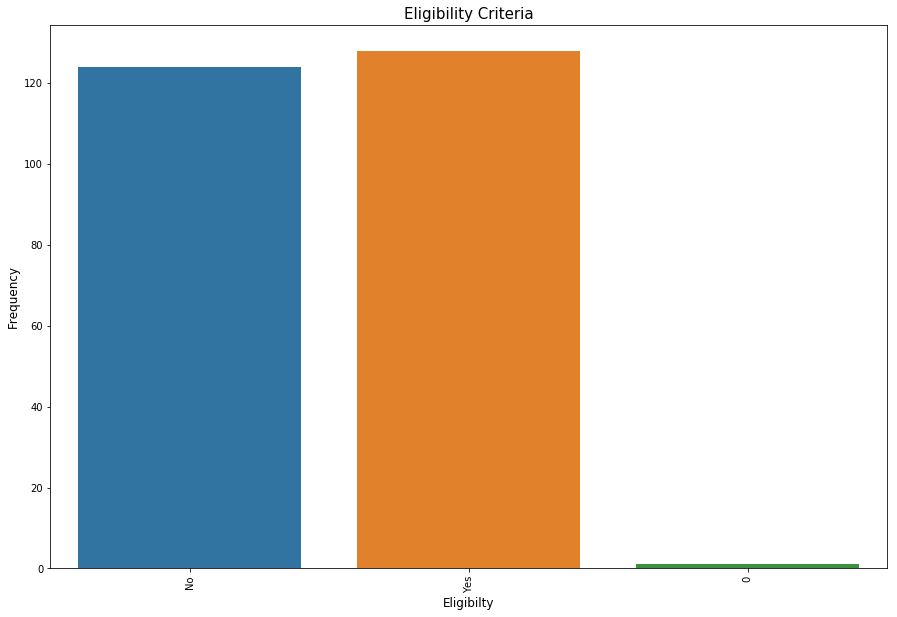

In [29]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Misson_Stem", data = univar_df)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Stem', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Mission-specific or General STEM?", fontsize=15)
plt.show()
  
fig = plt.figure(figsize=(15,10))
sns.countplot(x="Learner", data = univar_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Learner', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("STEM Learners Targeted? Specify", fontsize=15)
plt.show()
  
fig = plt.figure(figsize=(15,10))
sns.countplot(x = "K) Eligibility Restrictions", data =univar_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Eligibilty', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Eligibility Criteria", fontsize=15)
plt.show()

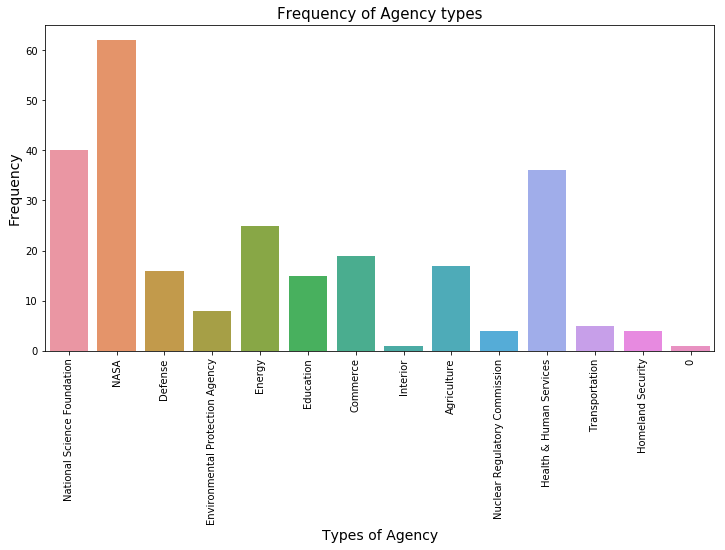

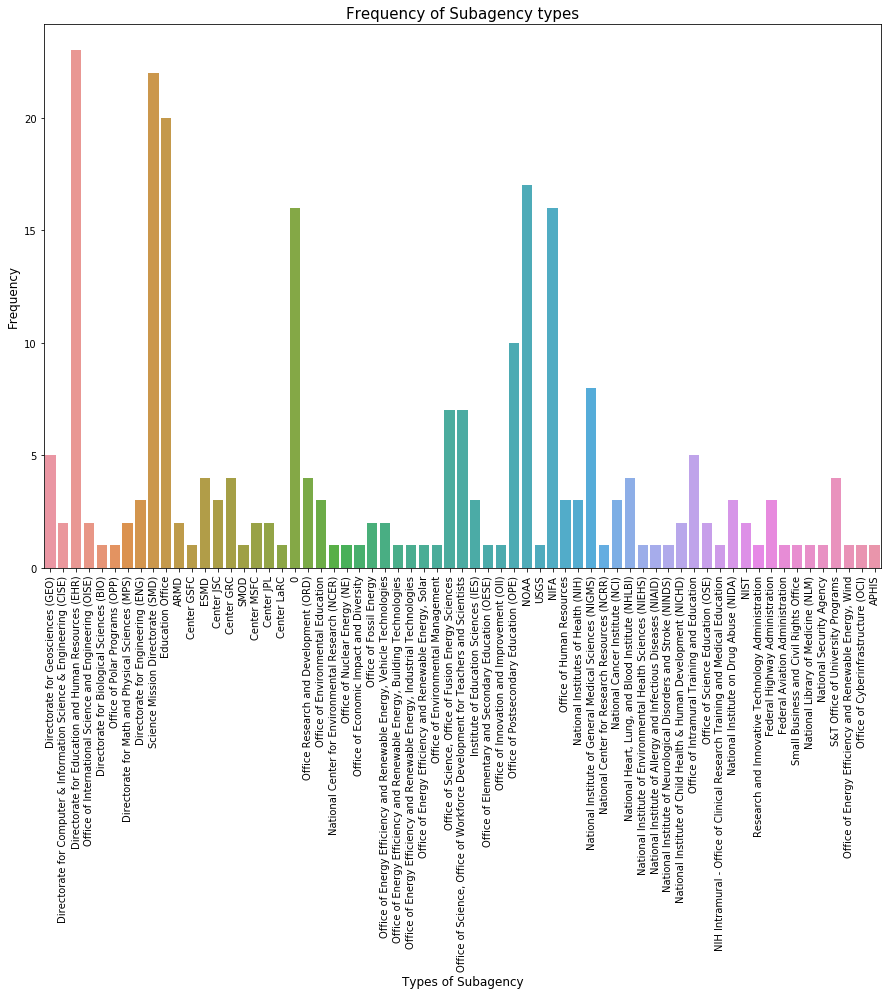

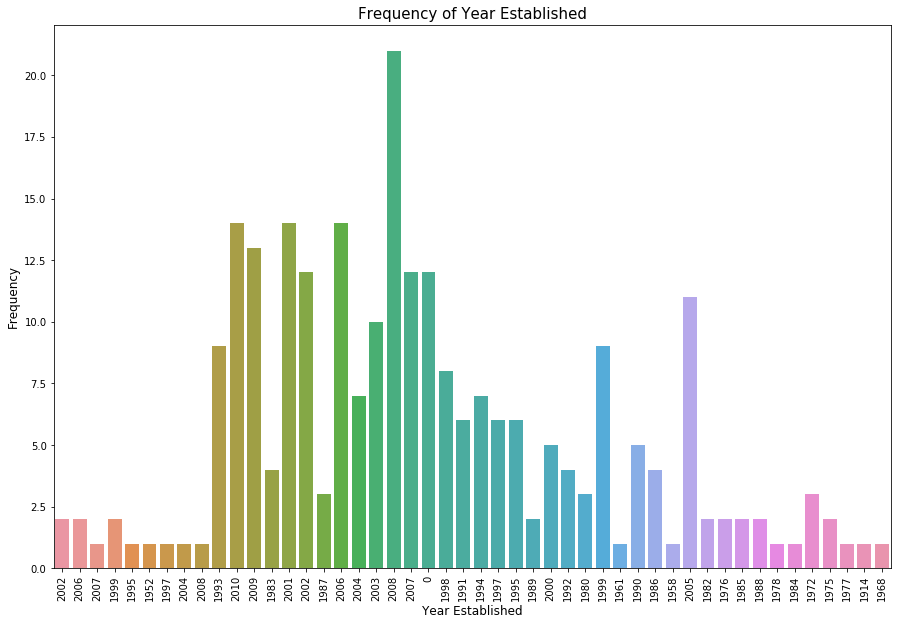

In [22]:
univar_df = df2[['Agency','Subagency','Misson_Stem','Learner','Year','K) Eligibility Restrictions','Target']]
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Agency", data = univar_df)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Types of Agency', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency of Agency types", fontsize=15)
plt.show()
  
fig = plt.figure(figsize=(15,10))
sns.countplot(x="Subagency", data = univar_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Types of Subagency', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Subagency types", fontsize=15)
plt.show()
  
fig = plt.figure(figsize=(15,10))
sns.countplot(x = "Year", data =univar_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Year Established', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Year Established", fontsize=15)
plt.show()

### Mutual_info_Score on target variable using non funding variable

In [30]:
df3 = univar_df[['Agency', 'Subagency', 'Misson_Stem', 'Learner','K) Eligibility Restrictions']]
df4 = pd.DataFrame({columns:df3[columns].astype('category').cat.codes for columns in df3})
df5 = pd.concat([df4,univar_df['Year']],axis=1)
df5.head()

,Agency,Subagency,Misson_Stem,Learner,K) Eligibility Restrictions,Year
1,11,13,2,0,1,2002
2,11,10,2,2,1,2006
3,11,10,2,0,1,2007
4,11,13,2,2,1,2002
5,11,13,2,2,1,1999


In [31]:
df5['Year'] = df5['Year'].astype('int')
target_variable = univar_df['Target']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df5, target_variable, test_size=0.30)

In [33]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20]}
model = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [44]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf.fit(X_train, y_train)
  
predict_y = clf.predict(X_test)
clf.score(X_test, y_test)
  
mutual_score = metrics.normalized_mutual_info_score(y_test, predict_y)
roc_score = roc_auc_score(y_test, predict_y)
print("Mutual Score:",mutual_score)
print("roc_curve:",roc_score)

Mutual Score: 0.029451814478157735
roc_curve: 0.5989547038327526


#### Conclusion:
<li> Mutual_info_score is very low for non funding variable,It means similarity among non Funding Variables are not good</li>
<li> Roc Curve On Non Funding Variable is 0.61</li>

<h1> Stage 3 </h1>

<li>Divide Dataset In (70:30)</li>
<li>Do feature Selection and use XGboost model</li>
<li>Write testcases on all user defined functions using pytest framework</li>


<p> we will add funding variable  to  df6 dataframe and let see what is the value we are getting for roc_auc_curve</p> 

In [93]:
fund_df = df2[['fund_2008','fund_2009','fund_2010']]
df6 = pd.concat([df5,fund_df],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df6, target_variable, test_size=0.30)


In [94]:
X_test.dtypes

Agency                            int8
Subagency                         int8
Misson_Stem                       int8
Learner                           int8
K) Eligibility Restrictions       int8
Year                             int32
fund_2008                      float64
fund_2009                      float64
fund_2010                      float64
dtype: object

In [117]:
def Xgboost(X_train,y_train,X_test,y_test):
    param_grid = {
        'silent': [False],
        'max_depth': [3,4,5,6,7],
        'subsample': [0.5, 0.6, 0.7,0.9],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8,],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, ],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'n_estimators': [5,10,20,25]}
    fit_params = {
              'eval_set': [(X_train, y_train)]
              }
    clf = xgb.XGBRegressor()
    rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            fit_params=fit_params,
                            refit=True, random_state=42)
    
    
    #s_clf = xgb.XGBRegressor(max_depth=3,min_child_weight=1.0,subsample=0.6,colsample_bytree = 0.7,colsample_bylevel = 0.6,n_estimators = 20)
    
    rs_clf.fit(X_train, y_train)
    rs_clf.score(X_test, y_test)
    predict_y = rs_clf.predict(X_test)
    mutual_score = metrics.normalized_mutual_info_score(y_test, predict_y)
    roc_score = roc_auc_score(y_test, predict_y)
    return roc_score
    

    

    
 

    

In [118]:
roc_curve= Xgboost(X_train,y_train,X_test,y_test)

print(roc_curve)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, silent=False, n_estimators=10, min_child_weight=7.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.7 
[0]	validation_0-rmse:0.491433
[1]	validation_0-rmse:0.487513
[2]	validation_0-rmse:0.482377
[3]	validation_0-rmse:0.475701
[4]	validation_0-rmse:0.472681
[5]	validation_0-rmse:0.469336
[6]	validation_0-rmse:0.46551
[7]	validation_0-rmse:0.452608
[8]	validation_0-rmse:0.449941
[9]	validation_0-rmse:0.447432
[CV]  subsample=0.7, silent=False, n_estimators=10, min_child_weight=7.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.7, total=   0.1s
[CV] subsample=0.7, silent=False, n_estimators=10, min_child_weight=7.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.7 
[0]	validation_0-rmse:0.492999
[1]	validation_0-rmse:0.490049
[2]	validation_0-rmse:0.48252
[3]	validation_0-rmse:0.482211
[4]	validation_0-rmse:0.471824
[5]	validation_0-rmse:0.461416
[6]	validation_0-rmse:0.454693
[7]	va

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  subsample=0.7, silent=False, n_estimators=10, min_child_weight=7.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.7, total=   0.1s
[CV] subsample=0.5, silent=False, n_estimators=25, min_child_weight=10.0, max_depth=6, colsample_bytree=0.5, colsample_bylevel=0.4 
[0]	validation_0-rmse:0.496721
[1]	validation_0-rmse:0.494347
[2]	validation_0-rmse:0.489119
[3]	validation_0-rmse:0.486686
[4]	validation_0-rmse:0.486039
[5]	validation_0-rmse:0.4828
[6]	validation_0-rmse:0.480125
[7]	validation_0-rmse:0.479025
[8]	validation_0-rmse:0.477736
[9]	validation_0-rmse:0.476956
[10]	validation_0-rmse:0.477025
[11]	validation_0-rmse:0.477259
[12]	validation_0-rmse:0.475384
[13]	validation_0-rmse:0.475143
[14]	validation_0-rmse:0.474988
[15]	validation_0-rmse:0.474602
[16]	validation_0-rmse:0.473176
[17]	validation_0-rmse:0.472808
[18]	validation_0-rmse:0.472894
[19]	validation_0-rmse:0.47357
[20]	validation_0-rmse:0.473682
[21]	validation_0-rmse:0.474167
[22]	validation_0-rmse:0.471436

[0]	validation_0-rmse:0.492013
[1]	validation_0-rmse:0.484524
[2]	validation_0-rmse:0.479597
[3]	validation_0-rmse:0.472214
[4]	validation_0-rmse:0.464454
[5]	validation_0-rmse:0.458441
[6]	validation_0-rmse:0.4541
[7]	validation_0-rmse:0.445951
[8]	validation_0-rmse:0.444138
[9]	validation_0-rmse:0.441031
[CV]  subsample=0.5, silent=False, n_estimators=10, min_child_weight=5.0, max_depth=5, colsample_bytree=0.7, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.7, silent=False, n_estimators=10, min_child_weight=7.0, max_depth=7, colsample_bytree=0.5, colsample_bylevel=0.6 
[0]	validation_0-rmse:0.492589
[1]	validation_0-rmse:0.487161
[2]	validation_0-rmse:0.478511
[3]	validation_0-rmse:0.471409
[4]	validation_0-rmse:0.467066
[5]	validation_0-rmse:0.460338
[6]	validation_0-rmse:0.457461
[7]	validation_0-rmse:0.456196
[8]	validation_0-rmse:0.444884
[9]	validation_0-rmse:0.440313
[CV]  subsample=0.7, silent=False, n_estimators=10, min_child_weight=7.0, max_depth=7, colsample_bytree=0

[5]	validation_0-rmse:0.440639
[6]	validation_0-rmse:0.4354
[7]	validation_0-rmse:0.427574
[8]	validation_0-rmse:0.42612
[9]	validation_0-rmse:0.421697
[CV]  subsample=0.5, silent=False, n_estimators=10, min_child_weight=1.0, max_depth=4, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.5, silent=False, n_estimators=10, min_child_weight=1.0, max_depth=4, colsample_bytree=0.8, colsample_bylevel=0.8 
[0]	validation_0-rmse:0.487576
[1]	validation_0-rmse:0.478524
[2]	validation_0-rmse:0.47008
[3]	validation_0-rmse:0.460629
[4]	validation_0-rmse:0.455633
[5]	validation_0-rmse:0.448131
[6]	validation_0-rmse:0.439089
[7]	validation_0-rmse:0.436108
[8]	validation_0-rmse:0.431182
[9]	validation_0-rmse:0.423107
[CV]  subsample=0.5, silent=False, n_estimators=10, min_child_weight=1.0, max_depth=4, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.9, silent=False, n_estimators=5, min_child_weight=3.0, max_depth=6, colsample_bytree=0.7, colsample

[0]	validation_0-rmse:0.492841
[1]	validation_0-rmse:0.487999
[2]	validation_0-rmse:0.482011
[3]	validation_0-rmse:0.472169
[4]	validation_0-rmse:0.471833
[CV]  subsample=0.6, silent=False, n_estimators=5, min_child_weight=3.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.5, total=   0.0s
[CV] subsample=0.6, silent=False, n_estimators=5, min_child_weight=3.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.5 
[0]	validation_0-rmse:0.493328
[1]	validation_0-rmse:0.492411
[2]	validation_0-rmse:0.485262
[3]	validation_0-rmse:0.485336
[4]	validation_0-rmse:0.478348
[CV]  subsample=0.6, silent=False, n_estimators=5, min_child_weight=3.0, max_depth=3, colsample_bytree=0.4, colsample_bylevel=0.5, total=   0.0s
[0]	validation_0-rmse:0.486223
[1]	validation_0-rmse:0.475404
[2]	validation_0-rmse:0.463568
[3]	validation_0-rmse:0.452017
[4]	validation_0-rmse:0.444445
[5]	validation_0-rmse:0.438108
[6]	validation_0-rmse:0.428927
[7]	validation_0-rmse:0.420335
[8]	validation_0-rmse:

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.2s finished


In [119]:
print(roc_curve)

0.8083333333333333


## Pytest 

In [135]:
__file__ = 'RedCarpet_Analysis.ipynb'

import pytest
import ipytest.magics

In [141]:
%%run_pytest[clean]
def test_work_():
    df = pd.read_excel(r'C:\Users\hp\Downloads\redcarpet.xls')
    df= df.reset_index(drop=True)
    final_df= df.rename(columns=df.iloc[0])
    df_work = final_df.reindex(final_df.index.drop(0))
    final = df_work.loc[:, df_work.isnull().mean() <= .35] # Dropping the Column having more than 35 % null value
    final.replace(np.nan, 0, inplace=True) #Replacing nan value with zero
    final.rename(columns={'C1) Funding FY2008': 'fund_2008', 'C2) Funding FY2009': 'fund_2009','C3) Funding FY2010':'fund_2010'}, inplace=True)
    amount_2008 = list(final['fund_2008'])
    amount_2009 = list(final['fund_2009'])
    percent_growth = []

    target = []
    for i in range(0, len(amount_2008)):
        if amount_2008[i] == 0:
            percent_growth.append(amount_2009[i]*100)
            target.append(0)
            continue
        growth = (amount_2009[i] - amount_2008[i]) / amount_2008[i]
        percent_growth.append(growth * 100)
        if growth > 0:
            target.append(1)
        else:
            target.append(0)
            
        
    final['Percent_Growth']=percent_growth

    final['Target']=target
    df2 = final.loc[:, final.columns.notnull()]
    df2.rename(columns={'B) Year Established': 'Year', 'D) Mission-specific or General STEM?': 'Misson_Stem','I1) STEM Learners Targeted? Specify.':'Learner','U) Measured Outputs':'Output'}, inplace=True)
    df3 = univar_df[['Agency', 'Subagency', 'Misson_Stem', 'Learner','K) Eligibility Restrictions']]
    df4 = pd.DataFrame({columns:df3[columns].astype('category').cat.codes for columns in df3})
    df5 = pd.concat([df4,univar_df['Year']],axis=1)
    df5['Year'] = df5['Year'].astype('int')
    target_variable = univar_df['Target']
    fund_df = df2[['fund_2008','fund_2009','fund_2010']]
    df6 = pd.concat([df5,fund_df],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df6, target_variable, test_size=0.30)
    roc_auc = Xgboost(X_train,y_train,X_test,y_test)
    
    
    assert roc_auc > 0.70
    

            
        
    
    

============================= test session starts =============================
platform win32 -- Python 3.6.4, pytest-3.3.2, py-1.5.2, pluggy-0.6.0
rootdir: C:\Users\hp, inifile:
collected 1 item

RedCarpet_Analysis.py .                                                  [100%]

========================== 1 passed in 1.62 seconds ===========================


## Conclusion
<li> Test is succesfull </li>
<li>For Non Funding Variable roc_auc_score was approx. 0.60 </li>
<li> Best roc_auc_score is approx 0.80 , and we can coclude that fund feature is playing a important role </li>
